###This notebook contains some usual analysis for LPA
It only works for output format in pdb.

In [26]:
import numpy as np
import pylab as plt
from lpa_pdb_diagnostics import *
from scipy.constants import e, c, m_e, epsilon_0
import os
import matplotlib
%matplotlib inline

Setting the directory path where the data are located:

In [27]:
dir_path = "//Volumes/Orsay/warp_200MeV_plateau_1600_13dec/data/"
#dir_path = os.getcwd() + "/data"

Setting the path for the results:

In [28]:
res_path = config.result_path

#Laser - Plasma Parameters
Here we define some of the laser plasma parameters.

In [29]:
# Some definitions of the laser plasma parameters
lambda0 = 0.8e-6
w0 = 2*np.pi*c/lambda0
laser_waist = 17e-6
plasma_dens = 2e24
plasma_length = 2.4e-3
wp = np.sqrt(plasma_dens * e**2/ (epsilon_0 * m_e))
lambda_plasma = 2*np.pi*c/wp

#Numerical Parameters
Here we define the necessary numerical parameters for the analysis

In [30]:
zmax = 2*lambda0
zmin = zmax - 6*lambda_plasma
nzplambda = 20
w_size = zmax - zmin
Nz = int(w_size*nzplambda/lambda0)
dz = w_size/Nz

#Generate values for file reading

In [31]:
inf = 0
sup = 0
period_int = 1000
period_ext = 1000
val = values( inf, sup, period_int, period_ext, plasma_length/dz )
longitudinal_position = val*dz

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


We create an array of file names that we analyze.

In [32]:
field = np.empty(len(val),dtype="S100")
N5 = np.empty(len(val),dtype="S100")
N6 = np.empty(len(val),dtype="S100")
N7 = np.empty(len(val),dtype="S100")
H = np.empty(len(val),dtype="S100")

# Initialize file names
for i, v in enumerate(val):
    field[i] = dir_path + "fields%06d.pdb" %v
    N5[i] = dir_path + "N5%06d.pdb" %v
    N6[i] = dir_path + "N6%06d.pdb" %v
    N7[i] = dir_path + "N7%06d.pdb" %v
    H[i] = dir_path + "H%06d.pdb" %v

#Reading files

We can either read a single file, or we can read a number of files using a loop.

##Single file reading

Example Case: Evaluation of laser c$\tau$ at one given instant
The instant that I would like to investigate is at $1.5mm$.

In [33]:
it_instant = int(0.2e-3/dz/period_int) #round off to the nearest 1000
f = FieldInstant(field[it_instant], np.pi/2, 
                 quantities= ["E", "zfield"])

** Processing ** Fields: Intialisation of //Volumes/Orsay/warp_200MeV_plateau_1600_13dec/data/fields005000.pdb **


####Zero crossing analysis
Returns the bucket positions, can be used in particle selection.

In [34]:
buckets = f.wakefield_zero_crossing()

###Fields analysis

####2D laser field
A 2D field laser plot using matplotlib

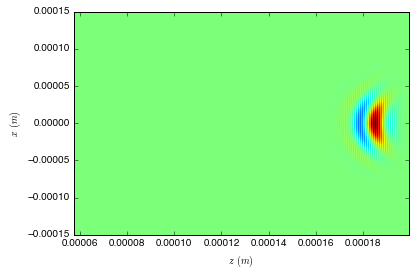

In [35]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
plt.imshow(f.laser_field, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####1D laser field

(57.505569435550377, 199.12503119627002)

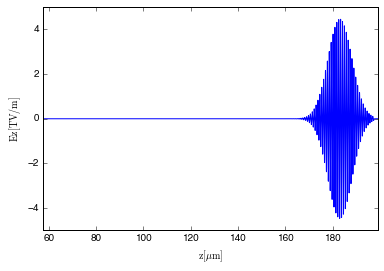

In [36]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(f.zfield)*1e6, np.array(f.laser_field[int(f.shape[0]/2),:])*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{Ez[TV/m]}$")
axarr.set_xlim( min(np.array(f.zfield)*1e6), max(np.array(f.zfield)*1e6))

####Laser c$\tau$

In [37]:
f.laser_ctau()

7.1832356710871059e-06

####Laser envelop

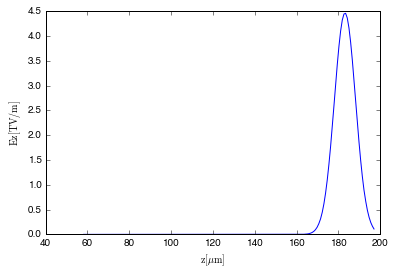

In [38]:
z, env = f.laser_envelop()
#Plotting
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(z)*1e6, np.array(env)*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{Ez[TV/m]}$")
#axarr.set_xlim( min(np.array(z)*1e6), max(np.array(z)*1e6))

####2D wakefield

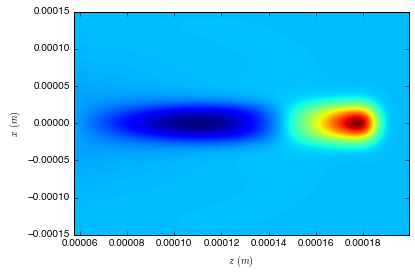

In [39]:
fig.patch.set_facecolor('white')
plt.imshow(f.ez, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####2D transverse field

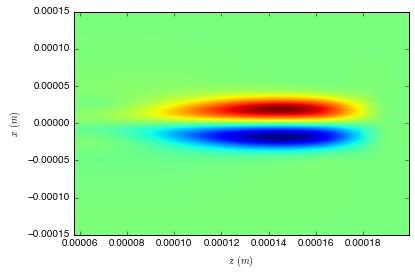

In [40]:
fig.patch.set_facecolor('white')
plt.imshow(f.ex, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####Superposition of 1D wakefield and transverse field

(57.505569435550377, 199.12503119627002)

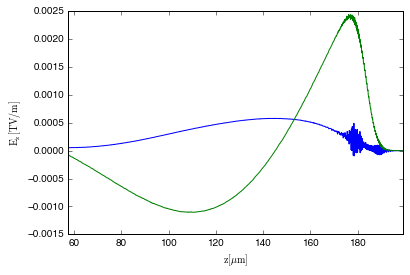

In [41]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(f.zfield)*1e6, np.array(f.ex[int(f.shape[0]/2)-9,:])*1e-12 )
axarr.plot( np.array(f.zfield)*1e6, np.array(f.ez[int(f.shape[0]/2),:])*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{E_z[TV/m]}$")
axarr.set_xlim( min(np.array(f.zfield)*1e6), max(np.array(f.zfield)*1e6))

###Particle analysis

####Beam spectrum
Instantiate partilcle objects

In [42]:
HH = ParticleInstant(H[it_instant], quantities = ["PID", "Weight", "Position", "Momentum"])
N66 = ParticleInstant(N6[it_instant])
N77 = ParticleInstant(N7[it_instant])
qdict = HH.get_qdict() ###qdict is normally the same for all particle quantities

** Processing ** Particles: Initialisation of //Volumes/Orsay/warp_200MeV_plateau_1600_13dec/data/H005000.pdb **
** Processing ** Particles: Initialisation of //Volumes/Orsay/warp_200MeV_plateau_1600_13dec/data/N6005000.pdb **
** Processing ** Particles: Initialisation of //Volumes/Orsay/warp_200MeV_plateau_1600_13dec/data/N7005000.pdb **


We choose particles here, two parameters of choice are offered: gamma_threshold and region of interest.

In [43]:
# we choose particles which have a gamma threshold between 40 to 400 
#and situated in the first accelerating bucket 
cPH = HH.select( gamma_threshold = [40,400])
cPN6 = N66.select( gamma_threshold = [40,400])
cPN7 = N77.select( gamma_threshold = [40,400])

Group all the particles before doing beam spectrum analysis. There are two ways to group particles and they are manifested using "keep_object_name" variable. If it's true, the information on the origin of these particles, ie the species of the particles is kept; otherwise, all the species' particle quantities will be merged.

In [44]:
ck_all_particles = quant_concatenate([cPN6,cPN7], keep_object_name= True) #keeping the information on the species
c_all_particles = quant_concatenate([cPN6,cPN7])

In [45]:
energy, dQdE = beam_spectrum(val[it_instant], 
                             ck_all_particles[qdict["gamma"]], 
                             ck_all_particles[qdict["w"]], lwrite=True,
                             leg=["N6","N7","Sum"])

Check if the particle arrays are empty.


####Beam peak evaluation and beam energy spread
We use the total energy spectrum to evaluate these properties.

In [46]:
#index -1: the sum of all species
try:
    t_energy = energy[-1]
    t_dQdE = dQdE[-1]
    Ipeak, Epeak, Cpeak = beam_peak( t_energy, t_dQdE)
    print "Peaks are situated at:"
    print "Index : %d" %Ipeak[-1]
    print "Energy: %f" %Epeak[-1]
    print "Charge: %f" %Cpeak[-1]
    peak = (Ipeak[-1], Epeak[-1], Cpeak[-1])
    deltaE , deltaEE = beam_energy_spread( t_energy, t_dQdE, peak = peak)
    print "Delta E: %f MeV, Delta E/E: %f" %(deltaE, deltaEE)
except IndexError:
    print "The spectrum is invalid"

The spectrum is invalid


####Beam emittance

In transverse directions

In [47]:
emitx = beam_emittance( val[it_instant],  c_all_particles, qdict, "x", 
                       histogram= True, lplot=True, lsavefig=True, lwrite=True ) 
emity = beam_emittance( val[it_instant],  c_all_particles, qdict, "y", 
                       histogram= True, lplot=True, lsavefig=True, lwrite=True )
print "Emittance in x-direction: ", emitx
print "Emittance in y-direction: ", emity

ValueError: zero-size array to reduction operation maximum which has no identity

Emittance with respect to gamma

In [ ]:
gamma, emittance = sorted_by_gamma_beam_emittance ( val[it_instant], c_all_particles, qdict, "x", lwrite = True,
                                                    lplot = True, lsavefig = True)

###Beam total charge

In [ ]:
charge = beam_charge(c_all_particles[qdict["w"]])
print "Charge: %f pC" %(charge*1e12) 

####Phase space plot with fields

In [ ]:
N_laser = f.normalizedField( w0, "laser")
N_wake = f.normalizedField( wp, "wake")

bigPicture( val[it_instant], c_all_particles[qdict["z"]], c_all_particles[qdict["gamma"]],
           c_all_particles[qdict["w"]], f.zfield, N_wake, N_laser, lwrite= True )